# Synthesize data using SDV & evaluate quality of a synthetic dataset using SDMetrics

## Overview

Evaluate quality of the synthetic dataset generated by comparing with that of real dataset across 3 categories of metrics which are :-

1. **Statistical metrics** which use statistical tests to compare the distributions of the real and synthetic distributions.
2. **Adversarial metrics** which use machine learning to try to distinguish between real and synthetic data.
3. **Descriptive metrics** which compute descriptive statistics on the real and synthetic datasets independently and then compare the values.

*For more information refer [here.](https://sdv-dev.github.io/SDMetrics/index.html)*

This notebook generates synthetic relational data using *SDV* module and uses *SDMetrics* to evaluate the quality of the generated datasets.

Demo relational database called 'walmart' is used below which contains stores, features and depts tables. All of these tables are related by Store key. SDV builds generative models for individual tables (using distributions- Guassian/exponential/uniform & covariances- guassian copula) and performs extra computations to account for the the relationships between them, using a method called Conditional Parameter Aggregation (CPA). (For more information refer [here](https://dai.lids.mit.edu/wp-content/uploads/2018/03/SDV.pdf))  

In [2]:
# Load datasets
from sdv import load_demo

metadata, real_tables = load_demo("walmart", metadata=True)
for table_name, df in real_tables.items():
    print(table_name, 'table: ')
    print(df.head().to_string(index=False))
    print('Table size', df.shape)
    print('###########################################################')

stores table: 
 Store Type    Size
     1    A  151315
     2    A  202307
     3    B   37392
     4    A  205863
     5    B   34875
Table size (45, 3)
###########################################################
features table: 
 Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday
     1 2010-02-05        42.31       2.572        NaN        NaN        NaN        NaN        NaN  211.096358         8.106      False
     1 2010-02-12        38.51       2.548        NaN        NaN        NaN        NaN        NaN  211.242170         8.106       True
     1 2010-02-19        39.93       2.514        NaN        NaN        NaN        NaN        NaN  211.289143         8.106      False
     1 2010-02-26        46.63       2.561        NaN        NaN        NaN        NaN        NaN  211.319643         8.106      False
     1 2010-03-05        46.50       2.625        NaN        NaN        NaN        NaN        

## Synthesize data (100 samples in each table)

In [3]:
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, real_tables)

synthetic_tables = sdv.sample_all(100)
for table_name, df in synthetic_tables.items():
    print(table_name, 'table: ')
    print(df.head().to_string(index=False))
    print('Table size', df.shape)
    print('###########################################################')

//anaconda3/envs/gan_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


stores table: 
Type    Size  Store
   A  148250      0
   B   50973      1
   A  136071      2
   B  135309      3
   B  183702      4
Table size (100, 3)
###########################################################
features table: 
                         Date   MarkDown1  Store  IsHoliday    MarkDown4    MarkDown3  Fuel_Price  Unemployment  Temperature     MarkDown5    MarkDown2         CPI
2013-08-29 18:03:03.366772224         NaN      0      False          NaN  2184.860951    3.557363      8.099844    54.600554  10210.134878  8889.219481  125.180339
2012-10-24 00:58:37.190470656  9859.42673      0      False          NaN          NaN    3.045544      8.627593    87.008787   6839.721072          NaN  133.109129
2011-03-14 20:55:08.887311872         NaN      0      False          NaN          NaN    3.199456      8.767124    64.606857           NaN          NaN  164.366930
2012-01-20 21:07:38.098774528         NaN      0      False  3936.086972          NaN    4.360665           NaN 

## Evaluation with SDMetrics

*Note: Manually install the package after cloning the repository. Pypi version is buggy*

In [7]:
from sdmetrics import evaluate
report = evaluate(metadata, real_tables, synthetic_tables)

# Print an overall metric value which is a composite score combining all metrics
print(report.overall())

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

-57.134390602701885


In [9]:
# Highlights where the model performs poorly
# Here for example markdownx variables are modelled poorly as suggested by the Kolmogorov–Smirnov test
report.highlights()

,Columns,Goal,Misc. Tags,Name,Tables,Unit,Value
0,column:MarkDown1,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,1.201400e-23
1,column:MarkDown4,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,1.470603e-52
2,column:MarkDown3,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,1.616530e-219
3,column:Fuel_Price,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,3.475324e-71
4,column:Unemployment,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,2.620613e-59
5,column:Temperature,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,1.386564e-09
6,column:MarkDown5,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,8.865376e-12
7,column:MarkDown2,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,8.213927e-213
8,column:CPI,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:features,p-value,8.550358e-298
9,column:Weekly_Sales,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:depts,p-value,0.000000e+00


## Generate visualization of the metrics

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/__init__.py:296: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=2.0)


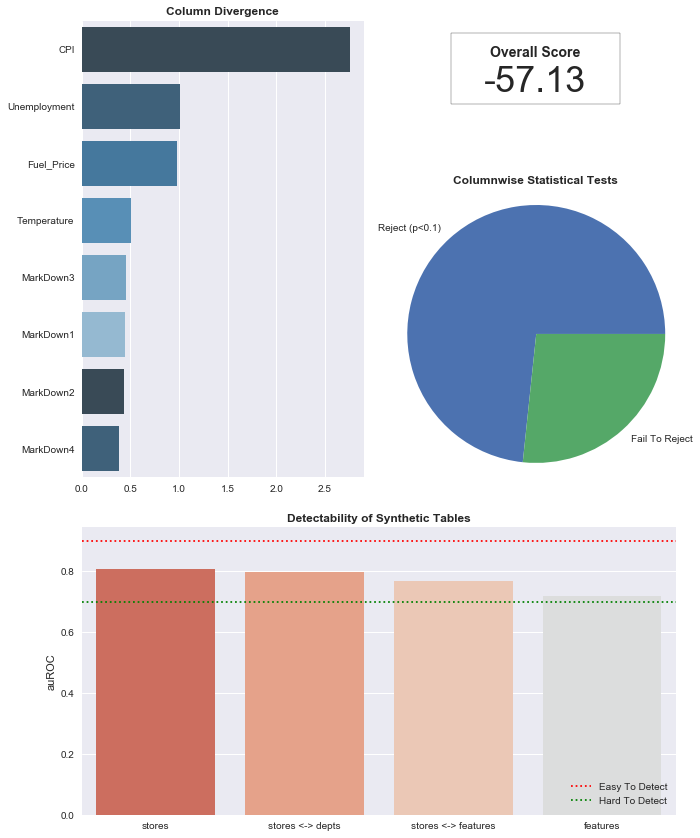

In [10]:
%matplotlib inline
report.visualize().savefig("visualize.png");